In [1]:
# bibliotecas utilizadas:

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [2]:
# lista para armazenar caminho de pastas
folder_paths = ["C:/Users/gusta/Documents/OneDrive - SABESP/Data Models/Imprensa/Modelo_RiscoImprensa/Base"]
# Lista para armazenar arquivos excel
excel_files = []
# Laço para capturar os arquivos do tipo xmls
for folder_path in folder_paths:
    for file in os.listdir(folder_path):
        if file.endswith(".xlsx"):  # Certifique-se de ajustar a extensão do arquivo se necessário
            excel_files.append(os.path.join(folder_path, file))

In [3]:
# lista para armazenar data frames
# laço para criar dataframe para cada arquivo armazenado
dataframes = []
for excel_file in excel_files:
    df = pd.read_excel(excel_file)
    dataframes.append(df)

# concatenar dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

C:\Users\gusta\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\gusta\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\gusta\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\gusta\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\gusta\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\gusta\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarnin

In [4]:
# análise prévia do material
combined_df.head()

,Data,Título,Link original,Veículo,Mídia geral,Tema,Sub-tema,Mensagem,Projeto Citado,Tom Auditoria,Sentimento Cena
0,2023-01-01 00:00:00,"""Primeiro vou cuidar das pessoas"", diz novo go...",https://bookcontent.boxnet.com.br/Visualizar/?...,DIÁRIO DE SUZANO,Web,Privatização ou capitalização,Privatização ou Capitalização,Não,NaN,Neutro,Favorável
1,2023-01-01 00:00:00,"“Primeiro vou cuidar das pessoas”, diz novo go...",https://bookcontent.boxnet.com.br/Visualizar/?...,ARARAQUARA NEWS / ARARAQUARA,Web,Privatização ou capitalização,Privatização ou Capitalização,Não,NaN,Neutro,Favorável
2,2023-01-01 00:00:00,"“Primeiro vou cuidar das pessoas”, diz novo go...",https://bookcontent.boxnet.com.br/Visualizar/?...,DIÁRIO DA REGIÃO ONLINE / SÃO JOSÉ DO RIO PRETO,Web,Privatização ou capitalização,Privatização ou Capitalização,Não,NaN,Neutro,Favorável
3,2023-01-01 00:00:00,"“Primeiro vou cuidar das pessoas”, diz novo go...",https://bookcontent.boxnet.com.br/Visualizar/?...,ISTOÉ ONLINE / SÃO PAULO,Web,Privatização ou capitalização,Privatização ou Capitalização,Não,NaN,Neutro,Favorável
4,2023-01-01 00:00:00,Chuva forte causa vazamento de esgoto em Suzan...,https://bookcontent.boxnet.com.br/Visualizar/?...,G1 / NACIONAL,Web,Esgoto,Vazamentos,Não,NaN,Negativo,Negativo


In [5]:
combined_df.Título.tail(500)

15912     Entrevista com o vereador Enoque, de Hortolândia
15913    Entrevista: Fábio Ribeiro Nunes, diretor da Sa...
15914                                     Erro conveniente
15915    Exposição de grafite na Estação Palmeiras Barr...
15916    Falhas no abastecimento: Moradores de 3 cidade...
                               ...                        
16407    Sabesp (SBSP3): governo pede cessão de André S...
16408    Tarcísio assume com desafio avançar em privati...
16409    Tarcísio assume com desafio de equilibrar alia...
16410    Tarcísio assume com desafio de equilibrar alia...
16411                       Transtornos por conta da chuva
Name: Título, Length: 500, dtype: object

In [6]:
combined_df['Tema'].value_counts()

Tema
Privatização ou capitalização       4021
Abastecimento de água               3058
Reparos / vazamentos / obras        2473
Institucional                       2411
Financeiro e novos negócios         1151
Saneamento                          1120
Eventos, patrocínios e parcerias     820
Esgoto                               581
Mananciais                           548
Novas tecnologias e inovação         187
Uso racional da água                  42
Name: count, dtype: int64

In [7]:
combined_df['Sub-tema'].value_counts()

Sub-tema
Privatização ou Capitalização               3155
Falta de água/Litoral Norte                  774
Privatização ou Capitalização / Eleições     672
Bolsa de Valores                             651
Desabastecimento                             432
                                            ... 
Bica                                           1
Conta - Acordo para pagamento                  1
Obras / Enchentes                              1
ESG - mulheres em cargos de lideranca          1
CEI Sabesp                                     1
Name: count, Length: 991, dtype: int64

In [8]:
# análise de nulls
combined_df.isnull().sum()

Data                   0
Título                 0
Link original          0
Veículo                0
Mídia geral            0
Tema                   0
Sub-tema               0
Mensagem               0
Projeto Citado     15457
Tom Auditoria          0
Sentimento Cena        0
dtype: int64

In [9]:
# análise de dados descritivos
combined_df.describe()

,Data,Título,Link original,Veículo,Mídia geral,Tema,Sub-tema,Mensagem,Projeto Citado,Tom Auditoria,Sentimento Cena
count,16412,16412,16412,16412,16412,16412,16412,16412,955,16412,16412
unique,367,12339,16403,1299,4,11,991,3,85,4,4
top,2023-04-10 00:00:00,Destaques,https://www.assiscity.com/local/ultimos-dias-d...,"RÁDIO BANDNEWS FM 96,9 / SÃO PAULO",Web,Privatização ou capitalização,Privatização ou Capitalização,Não,Novo Rio Pinheiros,Neutro,Favorável
freq,316,109,2,413,6856,4021,3155,15339,156,8229,8399


In [10]:
# verificando o conteúdo da coluna Projeto Citado
print(combined_df["Projeto Citado"].value_counts().head(10))

Projeto Citado
Novo Rio Pinheiros                          156
Campanha do Agasalho 2023                   143
Programa Aprendiz 2023                      123
Acertando Suas Contas com a Sabesp           68
Óleo do Bem                                  65
Onda Limpa                                   40
Campanha Lacres e Tampinhas de Esperança     36
Projeto Tietê                                34
Integra Tietê                                21
Programa Detecta                             18
Name: count, dtype: int64


In [11]:
# excluindo a coluna projeto citado
combined_df = combined_df.drop("Projeto Citado", axis=1)
combined_df.columns

Index(['Data', 'Título', 'Link original', 'Veículo', 'Mídia geral', 'Tema',
       'Sub-tema', 'Mensagem', 'Tom Auditoria', 'Sentimento Cena'],
      dtype='object')

In [12]:
combined_df.dtypes

Data               object
Título             object
Link original      object
Veículo            object
Mídia geral        object
Tema               object
Sub-tema           object
Mensagem           object
Tom Auditoria      object
Sentimento Cena    object
dtype: object

In [13]:
combined_df['Data'] = pd.to_datetime(combined_df['Data'])
combined_df.Data

0       2023-01-01
1       2023-01-01
2       2023-01-01
3       2023-01-01
4       2023-01-01
           ...    
16407   2022-12-31
16408   2022-12-31
16409   2022-12-31
16410   2022-12-31
16411   2022-12-31
Name: Data, Length: 16412, dtype: datetime64[ns]

In [14]:
combined_df.Data.max(), combined_df.Data.min()

(Timestamp('2023-07-31 00:00:00'), Timestamp('2022-08-01 00:00:00'))

In [15]:
# Definindo a ordem pela data
combined_df = combined_df.sort_values(by='Data')
combined_df.Data.head(3), combined_df.Data.tail(3)

(11451   2022-08-01
 11452   2022-08-01
 11440   2022-08-01
 Name: Data, dtype: datetime64[ns],
 11327   2023-07-31
 11319   2023-07-31
 11438   2023-07-31
 Name: Data, dtype: datetime64[ns])

In [16]:
# extrair uma tupla apenas com os títulos
df_titulo = combined_df['Título']
pd.df_titulo = df_titulo
df_titulo.head()

11451          Represas da região: Nível nos últimos meses
11452    Volume de chuva em julho foi o menor do ano na...
11440    Moradores da Vila Aurora e Santa Luzia sofrem ...
11463                      Mensagens dos telespectadores 2
11462    Bueiro vaza esgoto e incomoda moradores do Jar...
Name: Título, dtype: object

In [17]:
# qtde de linhas repetidos
rep_rows = df_titulo.shape[0] - df_titulo.nunique()
print(df_titulo.shape, '\n', 
      df_titulo.nunique(), '\n',
      rep_rows)

(16412,) 
 12339 
 4073


In [18]:
## FAZER UMA ANÁLISE ESPECIFICA DOS TITULOS REPETIDA

In [19]:
# dropar linhas repetidas e checar
df_titulos = df_titulo.drop_duplicates()
print(df_titulos.shape, df_titulos.nunique())

(12339,) 12339


In [20]:
# Unir os textos dos titulos em uma única string
all_text = " ".join(df_titulos)
all_text

'Represas da região: Nível nos últimos meses Volume de chuva em julho foi o menor do ano nas represas do Alto Tietê; índice representa 23,2% do esperado Moradores da Vila Aurora e Santa Luzia sofrem com racionamento de água durante a noite Mensagens dos telespectadores 2 Bueiro vaza esgoto e incomoda moradores do Jardim Bonsucesso novamente Sabesp: ação fecha em alta de 0,34% nesta segunda; veja valores Prefeitura e Sabesp anunciam ligação do Sistema São Lourenço para São Roque Ferros-velhos são autuados por receptação e falta de licença em Bertioga, SP Estudante prudentino arrecada 13 mil tampinhas de plástico para doar ao HE Estudante de PP arrecada 13 mil tampinhas de plástico para doar ao Hospital de Esperança BTG PACTUAL INCLUI ELETROBRAS E VIBRA EM CARTEIRA PARA AGOSTO Após Eletrobras, mercado aposta na privatização da Copasa; veja cenário para estatais de saneamento Bairros de Guarujá não têm água Movimento contra a Taxa do Lixo entrega carta democrática a Volpi Volume do Cantar

In [21]:
# Tokenizar o all_text
# objetivo é criar um corpus para avaliação a partir de parâmetros
nltk.download('punkt')
tokens = word_tokenize(all_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# Converter todas as palavras para lowercase
# aglutina termos e evita duplicidades ou subnotificação de tokens
tokens = [word.lower() for word in tokens]

In [23]:
# Remover stopwords
# as stopwords são palavras como preposições ou artigos que não acrescentam sentido ao texto
nltk.download('stopwords')
stop_words = set(stopwords.words("portuguese"))
cleaned_tokens = [word for word in tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Checar
cleaned_tokens

['represas',
 'região',
 ':',
 'nível',
 'últimos',
 'meses',
 'volume',
 'chuva',
 'julho',
 'menor',
 'ano',
 'represas',
 'alto',
 'tietê',
 ';',
 'índice',
 'representa',
 '23,2',
 '%',
 'esperado',
 'moradores',
 'vila',
 'aurora',
 'santa',
 'luzia',
 'sofrem',
 'racionamento',
 'água',
 'durante',
 'noite',
 'mensagens',
 'telespectadores',
 '2',
 'bueiro',
 'vaza',
 'esgoto',
 'incomoda',
 'moradores',
 'jardim',
 'bonsucesso',
 'novamente',
 'sabesp',
 ':',
 'ação',
 'fecha',
 'alta',
 '0,34',
 '%',
 'nesta',
 'segunda',
 ';',
 'veja',
 'valores',
 'prefeitura',
 'sabesp',
 'anunciam',
 'ligação',
 'sistema',
 'lourenço',
 'roque',
 'ferros-velhos',
 'autuados',
 'receptação',
 'falta',
 'licença',
 'bertioga',
 ',',
 'sp',
 'estudante',
 'prudentino',
 'arrecada',
 '13',
 'mil',
 'tampinhas',
 'plástico',
 'doar',
 'he',
 'estudante',
 'pp',
 'arrecada',
 '13',
 'mil',
 'tampinhas',
 'plástico',
 'doar',
 'hospital',
 'esperança',
 'btg',
 'pactual',
 'inclui',
 'eletrobras',

In [25]:
# Adicionar caracteres especiais à lista de stop words
# algumas "stopwords" precisam ser acrescentadas
stop_words.update([",", ":", "rt","@","?","(", ")",".","!", "%"])
cleaned_tokens = [word for word in cleaned_tokens if word not in stop_words]

In [26]:
# Checar
cleaned_tokens

['represas',
 'região',
 'nível',
 'últimos',
 'meses',
 'volume',
 'chuva',
 'julho',
 'menor',
 'ano',
 'represas',
 'alto',
 'tietê',
 ';',
 'índice',
 'representa',
 '23,2',
 'esperado',
 'moradores',
 'vila',
 'aurora',
 'santa',
 'luzia',
 'sofrem',
 'racionamento',
 'água',
 'durante',
 'noite',
 'mensagens',
 'telespectadores',
 '2',
 'bueiro',
 'vaza',
 'esgoto',
 'incomoda',
 'moradores',
 'jardim',
 'bonsucesso',
 'novamente',
 'sabesp',
 'ação',
 'fecha',
 'alta',
 '0,34',
 'nesta',
 'segunda',
 ';',
 'veja',
 'valores',
 'prefeitura',
 'sabesp',
 'anunciam',
 'ligação',
 'sistema',
 'lourenço',
 'roque',
 'ferros-velhos',
 'autuados',
 'receptação',
 'falta',
 'licença',
 'bertioga',
 'sp',
 'estudante',
 'prudentino',
 'arrecada',
 '13',
 'mil',
 'tampinhas',
 'plástico',
 'doar',
 'he',
 'estudante',
 'pp',
 'arrecada',
 '13',
 'mil',
 'tampinhas',
 'plástico',
 'doar',
 'hospital',
 'esperança',
 'btg',
 'pactual',
 'inclui',
 'eletrobras',
 'vibra',
 'carteira',
 'agos

In [27]:
# nova atualização de stop words e checagem
stop_words.update(["’", "-", "‘", "?", "`", "“", ".", ",", "”", ";", "$"])
cleaned_tokens = [word for word in cleaned_tokens if word not in stop_words]
cleaned_tokens

['represas',
 'região',
 'nível',
 'últimos',
 'meses',
 'volume',
 'chuva',
 'julho',
 'menor',
 'ano',
 'represas',
 'alto',
 'tietê',
 'índice',
 'representa',
 '23,2',
 'esperado',
 'moradores',
 'vila',
 'aurora',
 'santa',
 'luzia',
 'sofrem',
 'racionamento',
 'água',
 'durante',
 'noite',
 'mensagens',
 'telespectadores',
 '2',
 'bueiro',
 'vaza',
 'esgoto',
 'incomoda',
 'moradores',
 'jardim',
 'bonsucesso',
 'novamente',
 'sabesp',
 'ação',
 'fecha',
 'alta',
 '0,34',
 'nesta',
 'segunda',
 'veja',
 'valores',
 'prefeitura',
 'sabesp',
 'anunciam',
 'ligação',
 'sistema',
 'lourenço',
 'roque',
 'ferros-velhos',
 'autuados',
 'receptação',
 'falta',
 'licença',
 'bertioga',
 'sp',
 'estudante',
 'prudentino',
 'arrecada',
 '13',
 'mil',
 'tampinhas',
 'plástico',
 'doar',
 'he',
 'estudante',
 'pp',
 'arrecada',
 '13',
 'mil',
 'tampinhas',
 'plástico',
 'doar',
 'hospital',
 'esperança',
 'btg',
 'pactual',
 'inclui',
 'eletrobras',
 'vibra',
 'carteira',
 'agosto',
 'após'

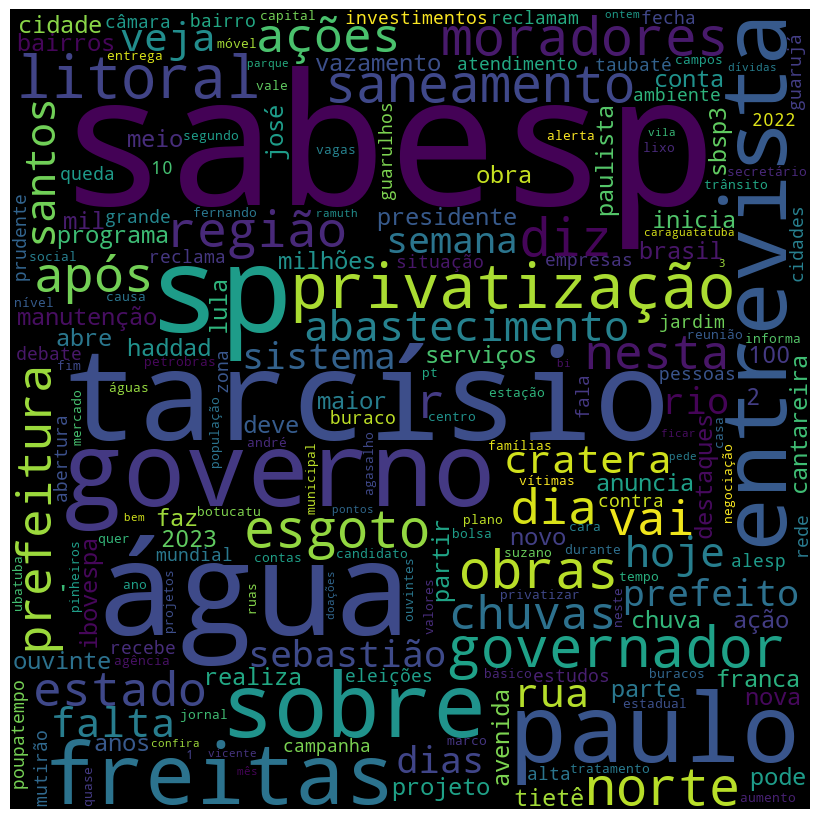

In [28]:
# Gerar a nuvem de palavras para melhor visualização da recorrência

freq = nltk.FreqDist(cleaned_tokens)
wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate_from_frequencies(freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

In [29]:
# retirar palavras da nuvem que não trazem significado sem contexto
# coloque como comentário caso não queira usar (#)
# stop_words.update(["", "", ""])
# cleaned_tokens = [word for word in cleaned_tokens if word not in stop_words]

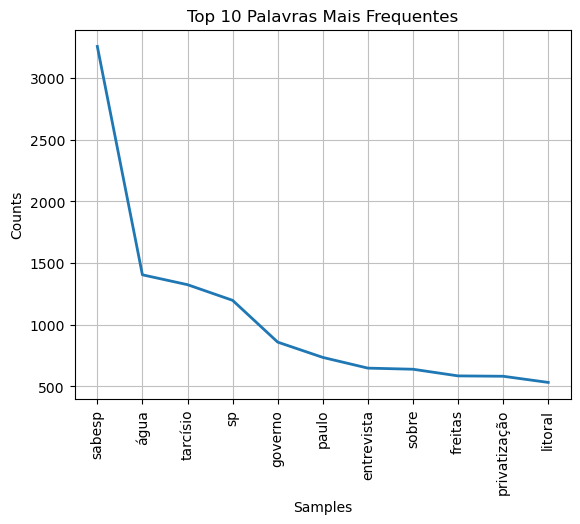

In [30]:
# plot com as palavras mais frequentes
plt.title('Top 10 Palavras Mais Frequentes')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
freq.plot(11, cumulative=False)
plt.show()

In [31]:
# lista com palavras mais recorrentes
# alterar o número para expandir opções
most_common = freq.most_common(20)
most_common

[('sabesp', 3258),
 ('água', 1405),
 ('tarcísio', 1325),
 ('sp', 1198),
 ('governo', 859),
 ('paulo', 735),
 ('entrevista', 648),
 ('sobre', 639),
 ('freitas', 585),
 ('privatização', 582),
 ('litoral', 532),
 ('governador', 478),
 ('moradores', 425),
 ('obras', 420),
 ('esgoto', 397),
 ('saneamento', 396),
 ('diz', 396),
 ('norte', 391),
 ('após', 362),
 ('região', 357)]

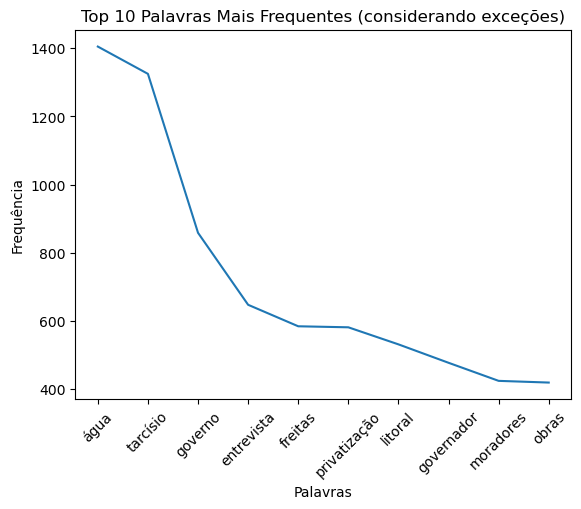

In [32]:
# como a palavra mais frequente será sempre a de valor buscado (sabesp) será removida
# também será retirada as palavras "paulo" "SP" porque são atributos do Estado de prestação dos serviços
# também a palavra sobre (preposição) que não traz significado sozinha
most_common = freq.most_common(14)
# exclusão de palavras
del most_common[7]
del most_common[5]
del most_common[3]
del most_common[0]
# utilizar a lista para criar os padrões do gráfico em um loop
words = [word for (word, freq) in most_common]
frequencies = [freq for (word, freq) in most_common]
# plotar um gráfico de linha com as frequências
plt.title('Top 10 Palavras Mais Frequentes (considerando exceções)')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.plot(words, frequencies)
# fazer uma rotação do eixo em 45 para exibir "melhor" os rótulos
plt.xticks(rotation=45)
plt.show()

In [33]:
# usar o pacote vader_lexicon da biblioteca nlkt (já em uso)
# para realizar a análise textual dos títulos
# uso do método de análise de sentimento e criação de coluna para atribuição do valor
# valor varia de -1 a 1 (do negativo ao positivo)
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# transformar a series de titulos limpa em um data frame
df_titulo = df_titulos.to_frame()
df_titulo.head()

,Título
11451,Represas da região: Nível nos últimos meses
11452,Volume de chuva em julho foi o menor do ano na...
11440,Moradores da Vila Aurora e Santa Luzia sofrem ...
11463,Mensagens dos telespectadores 2
11462,Bueiro vaza esgoto e incomoda moradores do Jar...


In [35]:
# adicionar uma nova coluna para a avaliação dos titulos
analyzer = SentimentIntensityAnalyzer()
df_titulo['sentimento'] = df_titulo['Título'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [36]:
# checar
df_titulo.head()

,Título,sentimento
11451,Represas da região: Nível nos últimos meses,0.0
11452,Volume de chuva em julho foi o menor do ano na...,0.0
11440,Moradores da Vila Aurora e Santa Luzia sofrem ...,0.0
11463,Mensagens dos telespectadores 2,0.0
11462,Bueiro vaza esgoto e incomoda moradores do Jar...,0.0


In [37]:
# checar a variação de valores de sentimentos
df_titulo['sentimento'].describe()

count    12339.000000
mean        -0.036897
std          0.122381
min         -0.743000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.636900
Name: sentimento, dtype: float64

In [38]:
# checar a qtde de valores únicos
df_titulo['sentimento'].nunique()

52

In [39]:
# checar a qtde para cada um dos valores
df_titulo['sentimento'].value_counts()

sentimento
 0.0000    10413
-0.2960     1579
-0.5267       59
 0.4939       29
 0.2023       27
 0.5859       24
 0.1280       23
 0.3818       16
-0.2500       15
 0.1027       11
-0.4767       10
 0.4019        9
 0.2500        9
 0.6124        8
 0.3612        7
 0.1779        7
-0.1027        6
 0.4824        6
-0.5423        5
 0.2960        5
-0.1779        5
-0.5106        5
 0.2732        4
-0.3595        4
 0.4215        4
 0.5160        4
-0.6808        4
-0.4466        4
 0.3680        3
-0.5859        3
-0.4404        3
-0.3818        3
 0.6369        3
-0.2732        2
-0.4981        2
 0.3400        2
-0.1280        1
-0.4019        1
 0.1531        1
 0.5719        1
-0.2023        1
 0.4753        1
 0.3182        1
-0.6249        1
-0.0258        1
-0.6597        1
 0.4278        1
-0.7430        1
 0.3164        1
 0.5106        1
-0.5707        1
-0.7096        1
Name: count, dtype: int64

In [44]:
# verificar qtde por sentimento e percentual relativo
neutro = df_titulo.query('sentimento == 0').count()[0]
neutrop = round(neutro/df_titulo.shape[0], 2)
negativo = df_titulo.query('sentimento < 0').count()[0]
negp = round(negativo/df_titulo.shape[0], 2)
positivo = df_titulo.query('sentimento > 0').count()[0]
posp = round(positivo/df_titulo.shape[0], 2)
print(f'Avalição dos títulos de notícias (12 meses):\n'
      f'Neutras: {neutro} ({neutrop}%)\n'
      f'Negativas: {negativo} ({negp}%)\n'
      f'Positivas: {positivo} ({posp}%)')


Avalição dos títulos de notícias (12 meses):
Neutras: 10413 (0.84%)
Negativas: 1718 (0.14%)
Positivas: 208 (0.02%)
